# <span style='color:orange'>Olympic Athletes data analysis</span>

>[Click here for Questions](https://docs.google.com/document/d/1PABnGLFw8Hws1mkdsuXUf9duSzuocfLNLfSr_u4RH3I/edit?usp=sharing)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bios = pd.read_csv('Pandas/datasets/bios.csv')

# <span style = 'color:coral'>Level 2</span>

### Which countries have produced the most athletes historically?

In [8]:
# athletes by country 
by_country = bios.groupby(bios['born_country']).size()
# top 5 countries wrt total athletes
by_country.sort_values(ascending = False)

born_country
USA       9641
GER       6891
GBR       5792
FRA       5143
ITA       4709
          ... 
MRT          1
MQE          1
Elster       1
Corfu        1
Havel        1
Length: 236, dtype: int64

> <span style='color:orange'>USA is the most with 9641 athletes</span>

### How does athlete production change across decades?


In [11]:
# athletes production: athletes born(not alive, not dead)
# athletes_by_year
# for athletes_by_year we must separate the year from date
bios['born_datetime'] = pd.to_datetime(bios['born_date'])
bios.head()


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [12]:
# extracting year from datetime
bios.insert(2, 'born_year', bios['born_datetime'].dt.year)
bios.head()

,athlete_id,name,born_year,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime
0,1,Jean-François Blanchy,1886.0,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,2,Arnaud Boetsch,1969.0,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,3,Jean Borotra,1898.0,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,4,Jacques Brugnon,1895.0,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,5,Albert Canet,1878.0,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [14]:
athletes_by_year = bios[['name','born_year']]
athletes_by_year

,name,born_year
0,Jean-François Blanchy,1886.0
1,Arnaud Boetsch,1969.0
2,Jean Borotra,1898.0
3,Jacques Brugnon,1895.0
4,Albert Canet,1878.0
...,...,...
145495,Polina Luchnikova,2002.0
145496,Valeriya Merkusheva,1999.0
145497,Yuliya Smirnova,1998.0
145498,André Foussard,1899.0


In [15]:
# year to decade
bios['decade'] = (bios['born_year'] // 10) * 10
bios['decade'].sort_values().unique()

array([1820., 1830., 1840., 1850., 1860., 1870., 1880., 1890., 1900.,
       1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980., 1990.,
       2000.,   nan])

In [21]:
# group by decade
by_decade = bios.groupby('decade')['name'].count()
by_decade

decade
1820.0        1
1830.0        7
1840.0       35
1850.0      154
1860.0      485
1870.0     1636
1880.0     3686
1890.0     3785
1900.0     5515
1910.0     5095
1920.0     6705
1930.0     9756
1940.0    12390
1950.0    13772
1960.0    19215
1970.0    21074
1980.0    21089
1990.0    15928
2000.0     3365
Name: name, dtype: int64

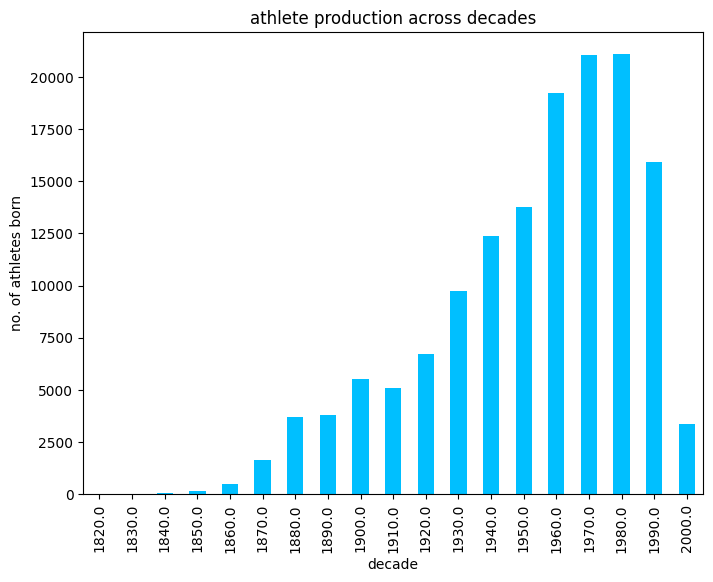

In [24]:
plt.figure(figsize = (8,6))
by_decade.plot(kind = 'bar', color = 'deepskyblue')
plt.xlabel('decade')
plt.ylabel('no. of athletes born')
plt.title('athlete production across decades')
plt.show()

### Are athlete counts concentrated in a few countries or widely distributed?

In [31]:
top_5 = by_country.sort_values(ascending = False).head()

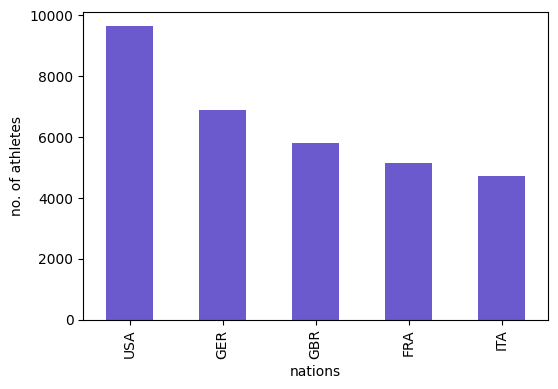

In [39]:
plt.figure(figsize = (6,4))
top_5.plot(kind = 'bar',color = 'slateblue')
plt.xlabel('nations')
plt.ylabel('no. of athletes')
plt.show()

### How many countries have produced fewer than 10 athletes?

In [35]:
by_country[by_country < 10]

born_country
AGU          2
ANT          2
ARU          8
ASA          2
Aarhus       1
Altmark      1
BHU          6
BRU          6
CHA          3
COK          1
COM          6
Cologne      3
Corfu        1
Elster       1
FAR          3
FLI          1
FPN          3
FSM          4
GEQ          7
GIB          1
GRL          9
GRN          4
GUE          5
Havel        1
IOM          8
IVB          2
JER          2
KIR          8
LBR          7
Luppe        2
MDV          6
MHL          5
MQE          1
MRT          1
MTN          2
MTS          2
Milde        2
Munich       1
NFI          1
NRU          6
OMA          8
PLW          9
Prignitz     1
RWA          8
SEY          1
SMT          1
STP          4
SWZ          7
Saale        3
Spreewald    1
TGA          4
TKS          2
TLS          9
TUV          3
Upland       2
VIN          8
YEM          4
dtype: int64

In [36]:
by_country[by_country < 10].count()

np.int64(57)

### Has global athlete participation increased post-1950?

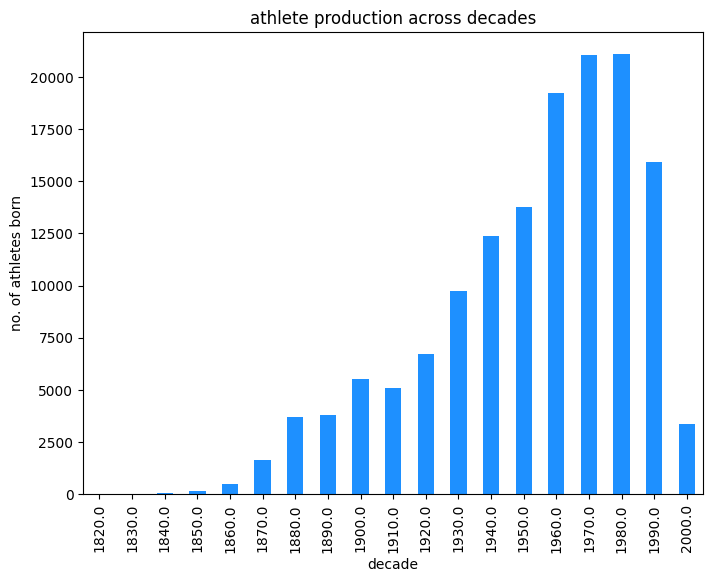

In [41]:
# Yes it has.
# after 1950s, 
# athletes prticipation increased to approx 19000 in 1960s
# in 1970s, it peaked to 21000 nearly
# 1980, almost similarto previous decade, but insignificant drop
# 1990s, dropped to 15000 approx
# early 2000s, plumetted to approx 3000. significant drop
# on an average participation has increased
plt.figure(figsize = (8,6))
by_decade.plot(kind = 'bar', color = 'dodgerblue')
plt.xlabel('decade')
plt.ylabel('no. of athletes born')
plt.title('athlete production across decades')
plt.show()
